# 线性调频信号

线性调频信号的数学表达式：
$$s(t) = rect(\frac{t}{T})exp(j{\pi}Kt^2)$$
其中，t是时间变量，单位为秒（s）；T为脉冲持续时间（周期）；K是线性调频率，单位是Hz/s；

角度（单位为弧度）表达式：
$$\varphi(t) = {\pi}Kt^2$$
对时间取微分后的瞬时频率为：
$$f=\frac{1}{2{\pi}} \frac{d\varphi(t)}{dt} = \frac{1}{2{\pi}} \frac{d(\pi Kt^2)}{dt}=Kt$$

信号的带宽是Chrip信号的斜率和时间的乘积： $$Bw = |K|T$$

In [17]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体 
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题 

In [23]:
B = 70e6 #带宽70MHz
T = 2e-6 #
Fs = 100e6 #采样率
N = T*Fs
t = np.arange(-T/2,T/2,1/Fs)


In [24]:
K=B/T

In [25]:
St = np.exp(1j*np.pi*K*np.square(t))
theta = np.pi*K*np.square(t)
f = K*t

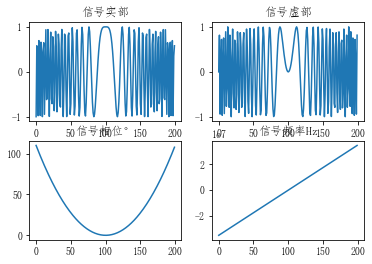

In [26]:
plt.figure()
plt.subplot(221)
plt.plot(np.real(St))
plt.title("信号实部")
plt.subplot(222)
plt.plot(np.imag(St))
# plt.imshow(SI, cmap=cmap)
plt.title("信号虚部")
plt.subplot(223)
plt.plot(theta)
# plt.imshow(SI, cmap=cmap)
plt.title("信号相位°")
plt.subplot(224)
plt.plot(f)
# plt.imshow(SI, cmap=cmap)
plt.title("信号频率Hz")

plt.show()



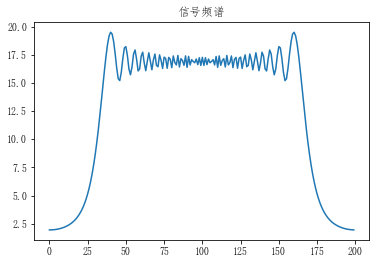

In [27]:
a = np.abs(np.fft.fftshift(np.fft.fft(St)))
plt.figure()
plt.plot(a)
plt.title("信号频谱")
plt.show()

下面的代码改自 https://zhuanlan.zhihu.com/p/395849685

In [32]:
T = 20e-3;                          #%脉宽
B = 20e3;                           #%信号带宽
K = B/T;                            #%调频斜率
Fs = 2*B;Ts = 1/Fs;                 #%采样频率及采样间隔
N = round(T/Ts);
t = np.linspace(-T/2,T/2,N);
#%% LFM信号产生
St = np.exp(1j*np.pi*K*np.square(t));             #%生成线性调频信号


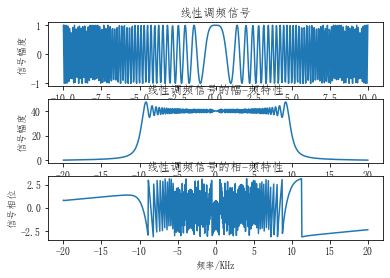

In [37]:
plt.figure();
plt.subplot(311)
plt.plot(t*1e3,np.real(St));
plt.xlabel('时间/ms');plt.ylabel('信号幅度');
plt.title('线性调频信号');

plt.subplot(312)
freq = np.linspace(-Fs/2,Fs/2,N);
Fw=np.fft.fftshift(np.fft.fft(St));
plt.plot(freq*1e-3,np.abs(Fw));
plt.xlabel('频率/KHz');plt.ylabel('信号幅度');
plt.title('线性调频信号的幅-频特性');

plt.subplot(313)
freq = np.linspace(-Fs/2,Fs/2,N);
Fw=np.fft.fftshift(np.fft.fft(St));
plt.plot(freq*1e-3,np.angle(Fw));
plt.xlabel('频率/KHz');plt.ylabel('信号相位');
plt.title('线性调频信号的相-频特性');

plt.show()
